In [122]:
# YC95

## Lab Assignment 01

 ## WARNING!
 Please note that the questions provided in this assignment are exclusively for your personal use in this course. You are strictly prohibited from distributing, sharing, or publishing these questions in any form or through any medium. This includes, but is not limited to, posting on websites, forums, social media platforms, or sharing with individuals not enrolled in this course. This measure is to ensure the integrity and educational value of the assignment for all students. Thank you for your cooperation and understanding.

Dr. Levent Bulut

## SUBMISSIONS INSTRUCTIONS:
**Google Colab File**: Submit your coding work as a Jupyter notebook file. The file should be named in the following format: "Lab01_LASTNAME_FIRSTINITIAL_SP24". For example, if your name is Leo Bulut, the file name should be "Lab01_Bulut_L_SP24".

**Word Document**: Submit a Word document with the same naming format as above. The Word document should only include your name at the top and your answers to each numbered question. Do not include the questions themselves in the document. Your name should be clearly written at the top of the document.

Please be aware that including the questions in your Word document submission will result in a deduction of points. Ensure you adhere to these guidelines for proper submission.

## Background
* You are being tasked to make sense of bank data.  The dataset in this lab comes from a large financial services firm and includes data from account holders. It focuses on those with home equity lines of credit, auto loans, and other short- to medium-term credit products. The dataset, termed 'BANK01' is a little bit dirty and your job is to clean it.
* A key aspect of the data is the target variable, which indicates the total new sales (INT_TGT).

## Data Dictionary:
#### Target Variable:
* **INT_TGT**: New Sales  (Accepts only non-negative numbers, including zero or NA)

#### Features:
**RFM1**: Average Sales Past Three Years (Accepts only non-negative numbers, including zero or NA)  

**RFM2**: Average Sales Lifetime (Accepts only non-negative numbers, including zero or NA)

**RFM3**: Average Sales Past Three Years Dir Promo Resp (Accepts only non-negative numbers, including zero or NA)

**RFM4**: Last Product Purchase Amount (Accepts only non-negative numbers, including zero or NA)

**RFM5**: Count Purchased Past 3 Years (Accepts only non-negative numbers, including zero or NA)

**RFM6**: Count Purchased Lifetime (Accepts only non-negative numbers, including zero or NA)

**RFM7**: Count Purchased Past 3 Years Dir Promo Resp (Accepts only non-negative numbers, including zero or NA)

**RFM8**: Count Purchased Lifetime Dir Promo Resp (Accepts only non-negative numbers, including zero or NA)

**RFM9**: Months Since Last Purchase (Accepts only non-negative numbers, including zero or NA)

**RFM10**: Count Total Promos Past Year (Accepts only non-negative numbers, including zero or NA)

**RFM11**: Count Direct Promos Past Year (Accepts only non-negative numbers, including zero or NA)

**RFM12**: Customer Tenure (Accepts only non-negative numbers, including zero or NA)

**DEMOG_AGE**: Customer Age Customer Tenure (Accepts only non-negative numbers, including zero or NA. Extremely high age values, anything higher than 130, should be treated as data entry error.)

**DEMOG_GENF**: Female Binary (yes/no)

**DEMOG_GENM**: Male Binary (yes/no)

**DEMOG_HO**: Homeowner Binary (yes/no)

**DEMOG_HOMEVAL**: Home Value (Accepts only non-negative numbers, including zero or NA)

**DEMOG_INC**: Income (Accepts only non-negative numbers, including zero or NA)

**DEMOG_PR**: Percentage retired in the area (Accepts only non-negative numbers including zero or NA. The highest value is 100.)


# Solve the "Spoiled cat problem"!

The "Spoiled Cat Problem" is a complex challenge in data science, resembling an unpredictable, fickle cat. It involves sophisticated data cleaning and analysis, where datasets display confusing, nonlinear patterns. This long-standing scientific puzzle tests advanced data techniques and remains unsolved, symbolizing a quest for clarity in chaotic data.

Well, it turns out that the "Spoiled Cat Problem" was actually a made up concept by your professor. It doesn't really exist. But, we might actually have a cat-related issue. The rumor has it, the only original copy of this dataset was left unattended while the person responsible for the the data collection stepped out for coffee. During this time, her mischievous cat, mistaking the computer mouse for a real one, ended up tampering with the dataset. If you don't believe me, you can consult your cat about such a scenario's likelihood! As a result, simple "Yes" responses may have turned into "Yesssssss," and numerical entries could have been changed to negative or absurdly high values. So, as you work through the questions, please keep this peculiar situation in mind.





## Read data in Google Colab

In [123]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)


#from google.colab import data_table
#data_table.enable_dataframe_formatter()

import pandas as pd

bank01=pd.read_csv('/content/bank01.csv')
bank01


<ipython-input-123-713d321ec19c>:10: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  bank01=pd.read_csv('/content/bank01.csv')


,int_tgt,demog_age,demog_ho,demog_homeval,demog_inc,demog_pr,rfm1,rfm2,rfm3,rfm4,rfm5,rfm6,rfm7,rfm8,rfm9,rfm10,rfm11,rfm12,demog_genf,demog_genm
0,0.0,42.0,no,90780,66811.0,0,7.4,6.05,6.75,10.0,5,40,4,22,7,28,7,126,yes,no
1,0.0,39.0,yes,191693,101626.0,0,5.14,4.88,5.00,5.0,7,8,6,7,22,12,6,41,no,yes
2,0.0,72.0,yes,141773,54565.0,1,12.75,9.00,14.50,12.0,5,11,3,5,19,14,7,65,no,yes
3,0.0,63.0,no,35283,0.0,1,3.67,3.92,3.25,10.0,7,27,5,16,8,13,5,129,no,yes
4,0.0,NaN,no,500006,0.0,24,15,11.80,15.00,15.0,4,11,3,7,17,15,7,53,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127084,500000.0,NaN,no,65017.0,64749.0,22,500.0,255.17,NaN,500.0,1,6,0,3,9,35,8,93,no,yes
127085,500000.0,NaN,no,65028.0,64743.0,23,500.0,255.17,NaN,500.0,2,7,1,4,10,36,9,94,yes,no
127086,500000.0,NaN,no,65003.0,64748.0,22,499.0,255.17,NaN,499.0,1,6,0,3,9,35,8,93,yes,no
127087,500000.0,NaN,no,64998.0,64745.0,22,500.0,255.17,NaN,500.0,1,6,0,3,9,35,8,93,no,yes


## Task 1
Your task is to conduct a thorough inspection of each variable in the dataset, keeping in mind the expected values outlined in the data dictionary. Without modifying the data, write a summary that highlights any issues you find for each variable. For example, if there are incorrectly entered 'NA' values, numbers that fall outside the expected range, or any other data inconsistencies, please note these in your response to question 1. Conversely, if a variable appears to have no issues with its data entries, simply state that there are no observed issues with that particular variable.

In [124]:
# If you utilized any coding to answer task 1, please input your code snippets here. Ensure that your codes are error-free when executed.
import pandas as pd

# Load the dataset

bank01=pd.read_csv('/content/bank01.csv')

# Initialize a dictionary to store findings
findings = {}

# Inspect each variable
for column in bank01.columns:
    # Check for NA or missing values
    missing_values = bank01[column].isnull().sum()

    # Additional checks can be performed here based on the data dictionary
    # For example, check for out-of-range values, unexpected data types, etc.

    # Summarize findings
    if missing_values > 0:
        findings[column] = f"Found {missing_values} missing values."
    # Add other conditions based on your checks
    else:
        findings[column] = "No observed issues."

# Output the findings
for column, finding in findings.items():
    print(f"{column}: {finding}")

int_tgt: No observed issues.
demog_age: Found 31611 missing values.
demog_ho: No observed issues.
demog_homeval: No observed issues.
demog_inc: No observed issues.
demog_pr: No observed issues.
rfm1: No observed issues.
rfm2: No observed issues.
rfm3: Found 9912 missing values.
rfm4: No observed issues.
rfm5: No observed issues.
rfm6: No observed issues.
rfm7: No observed issues.
rfm8: No observed issues.
rfm9: No observed issues.
rfm10: No observed issues.
rfm11: No observed issues.
rfm12: No observed issues.
demog_genf: No observed issues.
demog_genm: No observed issues.


<ipython-input-124-586ae0d76104>:6: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  bank01=pd.read_csv('/content/bank01.csv')


In [125]:
# If you utilized any coding to answer task 1, please input your code snippets here. Ensure that your codes are error-free when executed.

import pandas as pd

# Assuming 'bank01' is your DataFrame
# Check for missing values
missing_values = bank01.isnull().sum()

# Check for data inconsistencies, unexpected values, or outliers
# Examine unique values for each variable
unique_values = bank01.apply(lambda x: len(x.unique()))

# Output the results
print("Missing Values:")
print(missing_values)

print("\nUnique Values:")
print(unique_values)

# bank01



Missing Values:
int_tgt              0
demog_age        31611
demog_ho             0
demog_homeval        0
demog_inc            0
demog_pr             0
rfm1                 0
rfm2                 0
rfm3              9912
rfm4                 0
rfm5                 0
rfm6                 0
rfm7                 0
rfm8                 0
rfm9                 0
rfm10                0
rfm11                0
rfm12                0
demog_genf           0
demog_genm           0
dtype: int64

Unique Values:
int_tgt             70
demog_age           90
demog_ho             2
demog_homeval    96694
demog_inc        28142
demog_pr            87
rfm1              1388
rfm2              1869
rfm3               514
rfm4               113
rfm5                19
rfm6                94
rfm7                11
rfm8                34
rfm9                27
rfm10               64
rfm11               21
rfm12              183
demog_genf           4
demog_genm           4
dtype: int64


In [137]:
bank01.describe().T

,count,mean,std,min,25%,50%,75%,max
int_tgt,127089.0,11230.274139,8562.887384,-32000.00,6000.00,10000.00,16000.0,500000.00
demog_age,95478.0,60.611932,17.336888,-1.00,48.00,63.00,75.0,261.00
demog_inc,127089.0,43351.441919,31098.592441,0.00,26082.00,45383.00,61392.0,200005.00
demog_pr,127089.0,30.584417,11.950152,0.00,24.00,31.00,38.0,100.00
rfm2,127089.0,9.425295,8.042127,1.58,5.71,8.00,11.0,308.33
rfm3,117177.0,10.846061,9.079636,0.00,6.00,9.67,13.0,300.00
rfm4,127089.0,12.274433,14.016965,0.00,6.00,10.00,15.0,1000.00
rfm5,127089.0,4.438504,2.143331,0.00,3.00,4.00,6.0,18.00
rfm6,127089.0,13.842103,9.765097,0.00,7.00,12.00,18.0,127.00
rfm7,127089.0,2.563991,1.726713,0.00,1.00,2.00,4.0,10.00


## Task 2

Duplicate the original 'bank01' dataset and rename the copy as 'bank_[yourlastname]' (for example, Jane Doe would rename it to 'bank_doe'). Then proceed to make the specified adjustments in your renamed dataset, 'bank_[yourlastname]'


* For any data point that falls outside its expected range, label it as missing in the dataset.
*  Correct any spelling mistakes you encounter. For example, if the expected values are "YES" and "NO", but you find variations like "yes", "YESSSS", or "YESs", adjust them all to the standard form, which in this case would be "YES".


Once you've made the necessary modifications in your dataset, proceed to calculate the number of missing values and the percentage of missing values for each variable. Record your findings in the table provided in the Word document.





In [126]:
# If you utilized any coding to answer task 2, please input your code snippets here. Ensure that your codes are error-free when executed.

import pandas as pd
import numpy as np

bank01=pd.read_csv('/content/bank01.csv')

# Duplicate and rename the dataset
bank01_copy = bank01.copy()
bank01_copy.to_csv('bank_yourlastname.csv', index=False)  # Replace 'yourlastname' with your actual last name


<ipython-input-126-98bd339024f2>:6: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  bank01=pd.read_csv('/content/bank01.csv')


In [127]:
# Assuming you know the expected ranges for each column
# Example for a column 'age' with an expected range of 18 to 100
bank01_copy['demog_age'] = bank01_copy['demog_age'].apply(lambda x: x if 18 <= x <= 100 else pd.NA)

In [128]:
# Standardizing 'YES' and 'NO' values in a column 'demog_ho'
bank01_copy['demog_ho'] = bank01_copy['demog_ho'].replace(['yes', 'YESSSS', 'YESs', 'no', 'NOOO', 'No'], ['YES', 'YES', 'YES', 'NO', 'NO', 'NO'])


In [129]:
# Calculate the number of missing values for each variable
missing_values = bank01_copy.isnull().sum()

# Calculate the percentage of missing values for each variable
percentage_missing = (missing_values / len(bank01)) * 100

# Combine the two series into a DataFrame for better visualization
summary_bank01 = pd.DataFrame({
    'Number of Missing Values': missing_values,
    'Percentage of Missing Values': percentage_missing
})

# Display the summary
print(summary_bank01)

# Optional: Save the summary to a CSV file if needed
summary_bank01.to_csv('missing_value_summary.csv')

               Number of Missing Values  Percentage of Missing Values
int_tgt                               0                      0.000000
demog_age                         33251                     26.163555
demog_ho                              0                      0.000000
demog_homeval                         0                      0.000000
demog_inc                             0                      0.000000
demog_pr                              0                      0.000000
rfm1                                  0                      0.000000
rfm2                                  0                      0.000000
rfm3                               9912                      7.799259
rfm4                                  0                      0.000000
rfm5                                  0                      0.000000
rfm6                                  0                      0.000000
rfm7                                  0                      0.000000
rfm8                

# Task 3:  Imputation of Missing Values


Dduplicate and modify the 'bank_[yourlastname]' dataset that you saved during Task 2. This new version of the dataset should be named 'bank_[yourlastname]_revised'. For example, if your last name is 'Doe', the new dataset should be named 'bank_doe_revised'. After creating this duplicate, you are to perform a series of data imputation techniques listed below:
 * For a numerical column with missing values, use the mean of the column to fill in the gaps.
* In the case of a categorical column with missing data, use the mode (most frequent value) for imputation. If there are multiple modes, use the first mode to replace missing values.
* Once you have completed the data imputation on the 'bank_[yourlastname]_revised' dataset, your next task is to calculate the descriptive statistics for two specific numerical variables (demog_age and rfm1) and a contingency table between two categorical variables (demog_ho and demog_genf). This step serves as a sanity check to ensure the integrity and reasonableness of your imputed data. Enter your findings in the speficied table in the word document provided.




In [130]:
# If you utilized any coding to answer task 3, please input your code snippets here. Ensure that your codes are error-free when executed.

# Load the original dataset
bank01=pd.read_csv('/content/bank01.csv')

# Duplicate the dataset
bank01_revised = bank01.copy()

# Rename the duplicated dataset
bank01_revised.to_csv('bank_yourlastname_revised.csv', index=False)


<ipython-input-130-26ca19e5645b>:4: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  bank01=pd.read_csv('/content/bank01.csv')


In [131]:
# Data imputation values in numerical columans with the mean

# Impute missing values in a numerical column 'demog_age' with its mean
bank01_revised['demog_age'] = bank01_revised['demog_age'].fillna(bank01_revised['demog_age'].mean())

In [132]:
# Impute missing values in a categorical column 'demog_ho' with its mode
mode_demog_ho = bank01_revised['demog_ho'].mode()[0]
bank01_revised['demog_ho'] = bank01_revised['demog_ho'].fillna(mode_demog_ho)


In [160]:
# Calculate descriptive statistics for 'demog_age' and 'rfm1'
desc_stats_age = bank01_revised['demog_age'].describe()
desc_stats_rfm1 = bank01_revised['rfm1'].describe()

print("Descriptive Statistics for demog_age:\n", desc_stats_age)
print("\nDescriptive Statistics for rfm1:\n", desc_stats_rfm1)

# Calculate a contingency table for 'demog_ho' and 'demog_genf'
contingency_table = pd.crosstab(bank01_revised['demog_ho'], bank01_revised['demog_genf'])

print("\nContingency Table between demog_ho and demog_genf:\n", contingency_table)

Descriptive Statistics for demog_age:
 count    95478.000000
mean        60.611932
std         17.336888
min         -1.000000
25%         48.000000
50%         63.000000
75%         75.000000
max        261.000000
Name: demog_age, dtype: float64

Descriptive Statistics for rfm1:
 count     127089.0
unique      1388.0
top           10.0
freq        5275.0
Name: rfm1, dtype: float64

Contingency Table between demog_ho and demog_genf:
 demog_genf     no  nooooo    yes  yesssssss
demog_ho                                   
no          21773       1  35575          0
yes         30999       1  38739          1


In [161]:
print(bank01_revised.columns)

Index(['int_tgt', 'demog_age', 'demog_ho', 'demog_homeval', 'demog_inc',
       'demog_pr', 'rfm1', 'rfm2', 'rfm3', 'rfm4', 'rfm5', 'rfm6', 'rfm7',
       'rfm8', 'rfm9', 'rfm10', 'rfm11', 'rfm12', 'demog_genf', 'demog_genm'],
      dtype='object')


In [169]:
import pandas as pd

# Load your dataset
bank01_revised = pd.read_csv('/content/bank01.csv')

# Replace 'demog_age' with the actual column name you're interested in
mean_value = bank01_revised['demog_age'].mean()
median_value = bank01_revised['demog_age'].median()
std_dev = bank01_revised['demog_age'].std()

print(f"Mean of demog_age: {mean_value}")
print(f"Median of demog_age: {median_value}")
print(f"Standard Deviation of demog_age: {std_dev}")


Mean of demog_age: 60.61193154443956
Median of demog_age: 63.0
Standard Deviation of demog_age: 17.33688811380523


<ipython-input-169-61007c27cce3>:4: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  bank01_revised = pd.read_csv('/content/bank01.csv')


In [170]:
# Missing Values finding
bank01_revised.isnull().sum()

int_tgt              0
demog_age        31611
demog_ho             0
demog_homeval        0
demog_inc            0
demog_pr             0
rfm1                 0
rfm2                 0
rfm3              9912
rfm4                 0
rfm5                 0
rfm6                 0
rfm7                 0
rfm8                 0
rfm9                 0
rfm10                0
rfm11                0
rfm12                0
demog_genf           0
demog_genm           0
dtype: int64

# Task 4


*   Using Python, calculate the **correlation** between the target variable "INT_TGT" and all numeric features in your 'bank_[yourlastname]_revised' dataset. Identify the numeric variable that shows the highest correlation coefficient (in absolute value) with "INT_TGT". Then, create a scatter plot in Python to visually represent the relationship between "INT_TGT" and this highly correlated numeric variable. After completing your plot, insert it into the left pane of the Word document provided for this assignment.
*   Based on the scatter plot you have created, write a brief paragraph discussing your observations. In your analysis, describe the nature of the relationship between the target variable and the numeric variable with the highest correlation coefficient. Is the relationship positive, negative, linear, or non-linear? Provide insights based on the data description and what you can infer from the scatter plot. Your paragraph should offer a clear interpretation of the data visualization, highlighting any notable patterns or trends you observe. Insert your answer to the right pane under Task 4.



In [171]:
# If you utilized any coding to answer task 4, please input your code snippets here. Ensure that your codes are error-free when executed.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
bank01_revised = pd.read_csv('/content/bank01.csv')


<ipython-input-171-64292374f595>:7: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  bank01_revised = pd.read_csv('/content/bank01.csv')


In [172]:
# Calculate the correlation matrix
correlation_matrix = bank01_revised.corr()

<ipython-input-172-2c8caae20ca0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bank01_revised.corr()


In [173]:
print(bank01_revised.columns)

Index(['int_tgt', 'demog_age', 'demog_ho', 'demog_homeval', 'demog_inc',
       'demog_pr', 'rfm1', 'rfm2', 'rfm3', 'rfm4', 'rfm5', 'rfm6', 'rfm7',
       'rfm8', 'rfm9', 'rfm10', 'rfm11', 'rfm12', 'demog_genf', 'demog_genm'],
      dtype='object')


In [174]:
# Extract the correlations of all variables with 'INT_TGT'
# Drop the correlation of 'INT_TGT' with itself

correlation_with_target = correlation_matrix['int_tgt'].drop('int_tgt', axis=0)

The variable with the highest correlation with INT_TGT is rfm2 with a coefficient of 0.3181601145755563


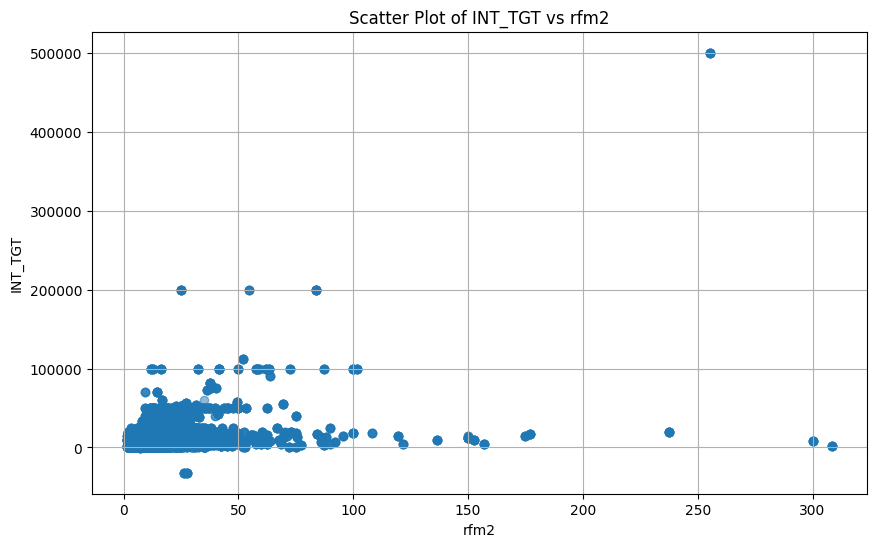

In [175]:
# Identify the variable with the highest absolute correlation with INT_TGT
highest_corr_variable = correlation_with_target.abs().idxmax()
highest_corr_value = correlation_with_target[highest_corr_variable]

# Print out the highest correlation for verification
print(f"The variable with the highest correlation with INT_TGT is {highest_corr_variable} with a coefficient of {highest_corr_value}")


# Create a scatter plot of the variable with the highest correlation with INT_TGT
plt.figure(figsize=(10, 6))
plt.scatter(bank01_revised[highest_corr_variable], bank01_revised['int_tgt'], alpha=0.5)
plt.title(f'Scatter Plot of INT_TGT vs {highest_corr_variable}')
plt.xlabel(highest_corr_variable)
plt.ylabel('INT_TGT')
plt.grid(True)
plt.show()

# Task 5: Check for Outliers
In this task, you are required to identify outliers in the numerical variables of the 'bank_[yourlastname]_revised' dataset. You will use the Interquartile Range (IQR) method for this purpose. Additionally, you will create box and whisker plots for both the target variable and the numerical variable that shows the highest correlation (in absolute value) with the target variable.
* In one approach, outliers are the values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR (where Q1 and Q3 are the first and third quartiles, respectively). Identify and list the outliers for each numerical variable and report your findings in the dedicated are in the word document provided. You can  just report the number of outliers detected for each variable.  
* Create a box and whisker plot for the target variable in your dataset and insert it intio the word document.
* Create a box and whisker plot for the numerical variable which shows the higest correlation (in absolute value) with the target variable and insert it intio the word document.  
* What these plots indicate about the distribution of the target variable and the most correlated numerical variable?



In [119]:
# If you utilized any coding to answer task 5, please input your code snippets here. Ensure that your codes are error-free when executed.

import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
bank_lastname_revised = pd.read_csv('/content/bank01.csv')

# Calculate the correlation matrix to identify the most correlated variable
correlation_matrix = bank_lastname_revised.corr()
correlation_with_target = correlation_matrix['int_tgt'].drop('int_tgt', axis=0)
highest_corr_variable = correlation_with_target.abs().idxmax()

# Calculate the IQR for each numerical variable and count the outliers
outliers_dict = {}
for column in bank_lastname_revised.select_dtypes(include=['number']).columns:
    Q1 = bank_lastname_revised[column].quantile(0.25)
    Q3 = bank_lastname_revised[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = bank_lastname_revised[(bank_lastname_revised[column] < lower_bound) | (bank_lastname_revised[column] > upper_bound)]
    outliers_dict[column] = outliers.shape[0]

# Print the number of outliers for each variable
for column, num_outliers in outliers_dict.items():
    print(f"{column} has {num_outliers} outliers")


<ipython-input-119-6f79ca12e834>:7: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  bank_lastname_revised = pd.read_csv('/content/bank01.csv')
<ipython-input-119-6f79ca12e834>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bank_lastname_revised.corr()


int_tgt has 1113 outliers
demog_age has 737 outliers
demog_inc has 2345 outliers
demog_pr has 6488 outliers
rfm2 has 6636 outliers
rfm3 has 5166 outliers
rfm4 has 3401 outliers
rfm5 has 1493 outliers
rfm6 has 5243 outliers
rfm7 has 310 outliers
rfm8 has 2646 outliers
rfm9 has 19625 outliers
rfm10 has 24607 outliers
rfm11 has 14658 outliers
rfm12 has 44 outliers


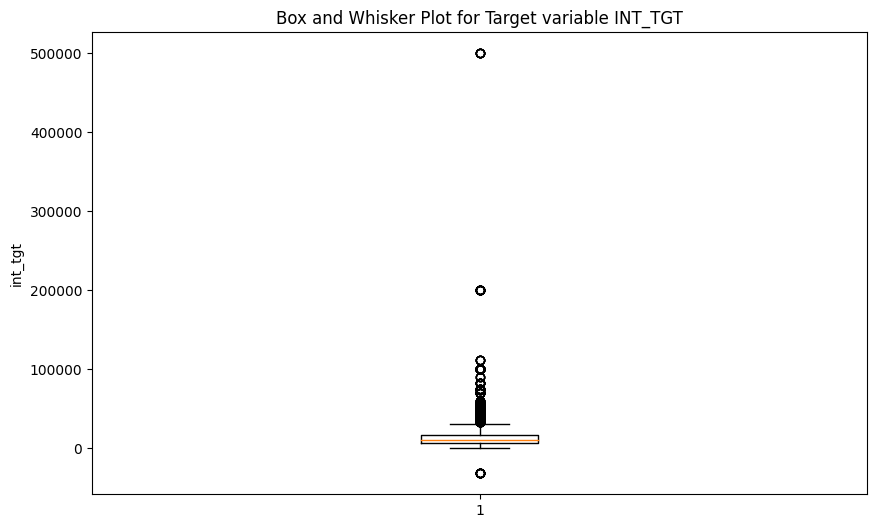

In [120]:
# Create a box and whisker plot for the target variable 'INT_TGT'
plt.figure(figsize=(10, 6))
plt.boxplot(bank_lastname_revised['int_tgt'])
plt.title('Box and Whisker Plot for Target variable INT_TGT')
plt.ylabel('int_tgt')
plt.savefig('boxplot_INT_TGT.png')
plt.show()

The variable with the highest correlation with INT_TGT is rfm2 with a coefficient of 0.3181601145755563


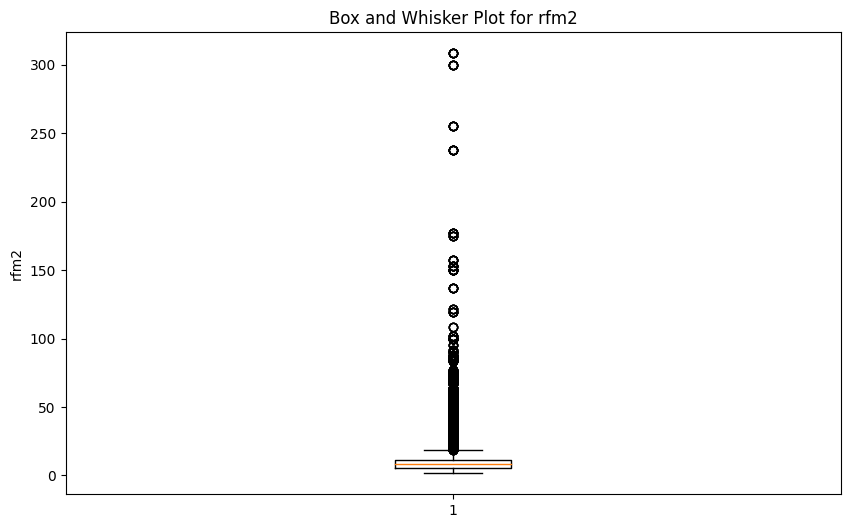

In [121]:
# Print out the highest correlation for verification
print(f"The variable with the highest correlation with INT_TGT is {highest_corr_variable} with a coefficient of {highest_corr_value}")

# Create a box and whisker plot for the most correlated numerical variable
plt.figure(figsize=(10, 6))
plt.boxplot(bank_lastname_revised[highest_corr_variable])
plt.title(f'Box and Whisker Plot for {highest_corr_variable}')
plt.ylabel(highest_corr_variable)
plt.savefig(f'boxplot_{highest_corr_variable}.png')
plt.show()

# Interpretation of the plots:
# The length of the box represents the IQR, which indicates the spread of the middle 50% of the data.
# The whiskers extend to the furthest points that are not considered outliers.
# Outliers are typically represented as individual points beyond the whiskers.